In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/houses.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10082 non-null  int64  
 1   Location             10082 non-null  object 
 2   Property type        10082 non-null  object 
 3   Property subtype     10082 non-null  object 
 4   Price                9958 non-null   float64
 5   Type of sale         10082 non-null  object 
 6   Number of bedrooms   9970 non-null   float64
 7   Living area          7750 non-null   float64
 8   Kitchen              9285 non-null   object 
 9   Furnished            7084 non-null   object 
 10  Open fireplace       10082 non-null  bool   
 11  Terrace              10082 non-null  object 
 12  Terrace orientation  10082 non-null  object 
 13  Garden               10082 non-null  object 
 14  Garden orientation   10082 non-null  object 
 15  Surface area land    9970 non-null  

In [5]:
df.head()

,Unnamed: 0,Location,Property type,Property subtype,Price,Type of sale,Number of bedrooms,Living area,Kitchen,Furnished,Open fireplace,Terrace,Terrace orientation,Garden,Garden orientation,Surface area land,Number of facades,Pool,Condition
0,0,Verviers,HOUSE,HOUSE,296607.0,residential_sale,3.0,130.0,Unknown,False,False,True,Unknown,True,Unknown,239.0,3,NaN,AS_NEW
1,1,Haasdonk,HOUSE,HOUSE,560000.0,residential_sale,4.0,NaN,Unknown,NaN,False,Unknown,Unknown,Unknown,Unknown,626.0,3,NaN,AS_NEW
2,2,VIANE,HOUSE,HOUSE,299000.0,residential_sale,5.0,200.0,SEMI_EQUIPPED,False,False,Unknown,Unknown,Unknown,Unknown,1150.0,NaN,NaN,GOOD
3,3,Gerpinnes,HOUSE,HOUSE,300000.0,residential_sale,0.0,270.0,Unknown,False,False,True,SOUTH,True,SOUTH,498.0,3,False,NaN
4,4,Nivelles,HOUSE,HOUSE,195000.0,residential_sale,3.0,135.0,INSTALLED,False,False,True,Unknown,Unknown,Unknown,165.0,2,False,NaN


# Cleaning

## Price cleaning

In [9]:
df['Price'].isna().sum()

124

In [13]:
df = df.dropna(subset=['Price'])
df['Price'].isna().sum()

0

In [14]:
df['Price'].dtype

dtype('float64')

## Exploration of simple data frame

In [15]:
df.columns

Index(['Unnamed: 0', 'Location', 'Property type', 'Property subtype', 'Price',
       'Type of sale', 'Number of bedrooms', 'Living area', 'Kitchen',
       'Furnished', 'Open fireplace', 'Terrace', 'Terrace orientation',
       'Garden', 'Garden orientation', 'Surface area land',
       'Number of facades', 'Pool', 'Condition'],
      dtype='object')

In [16]:
df_simple = df[['Surface area land','Living area','Price']]

In [17]:
df_simple.isna().sum()

Surface area land       0
Living area          2219
Price                   0
dtype: int64

In [19]:
df_simple = df_simple.dropna()

In [21]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7739 entries, 0 to 10080
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Surface area land  7739 non-null   float64
 1   Living area        7739 non-null   float64
 2   Price              7739 non-null   float64
dtypes: float64(3)
memory usage: 241.8 KB


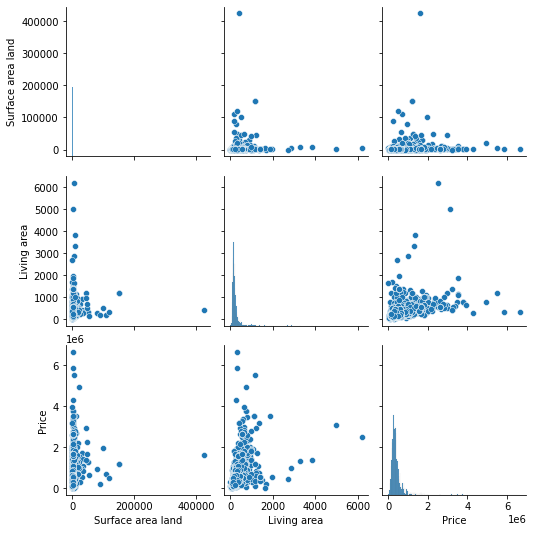

In [22]:
sns.pairplot(df_simple)

/Users/wvdvijve/.pyenv/versions/3.8.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surface area land'>

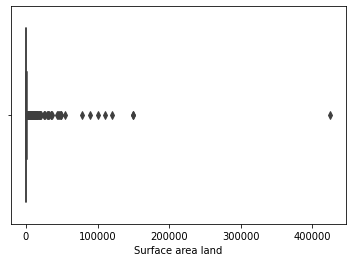

In [23]:
sns.boxplot(df_simple['Surface area land'])

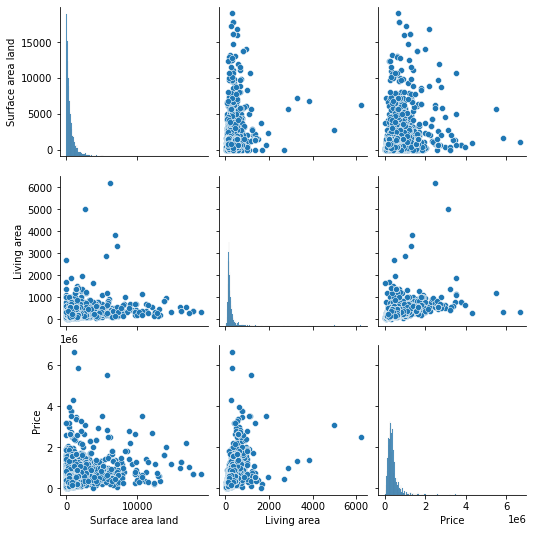

In [28]:
sns.pairplot(df_simple[df_simple['Surface area land']<20000])

In [29]:
df_simple['Surface_log'] = df_simple['Surface area land'].apply(np.log)

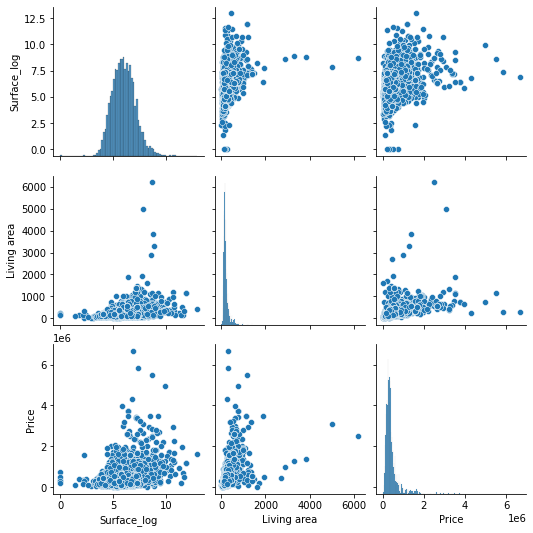

In [30]:
sns.pairplot(df_simple[['Surface_log', 'Living area',  'Price']])

### Naive linear model

In [33]:
X = df_simple[['Surface area land', 'Living area']]
y = df_simple['Price']

In [36]:
from sklearn.linear_model import LinearRegression



The train score is 0.28909979270648045
The test score is 0.32269573096559134


In [ ]:
from sklearn.model_selection import train_test_split



def easy_modeler(X, y , model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    this_model = model()
    this_model.fit(X_train, y_train)

    train_score =this_model.score(X_train, y_train)
    test_score =this_model.score(X_test, y_test)

    print(f'The train score is {train_score}')
    print(f'The test score is {test_score}')
